In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

classes = trainset.classes

100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [01:00<00:00, 2823383.10it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.pool(self.relu1(self.conv1(x)))
        x = self.pool(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
print(model)


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch 1/5, Loss: 0.4942
Epoch 2/5, Loss: 1.0364
Epoch 3/5, Loss: 0.2748
Epoch 4/5, Loss: 0.5874
Epoch 5/5, Loss: 0.4964


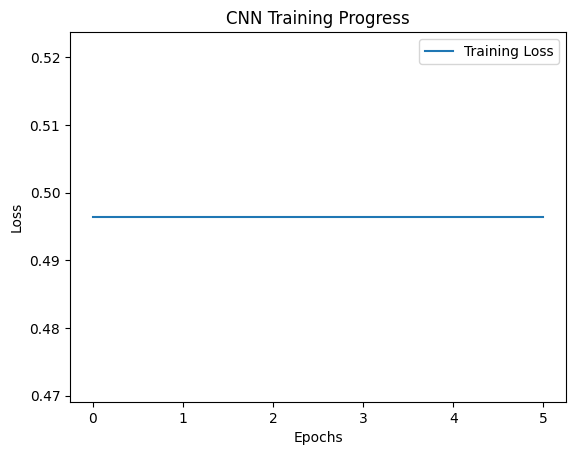

In [6]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

losses = []
def animate(epoch):
    ax.clear()
    losses.append(loss.item())
    ax.plot(losses, label="Training Loss")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.set_title("CNN Training Progress")

ani = animation.FuncAnimation(fig, animate, frames=num_epochs, repeat=False)
ani.save("cnn-model.gif", writer = 'pillow', fps = 10)
plt.show()


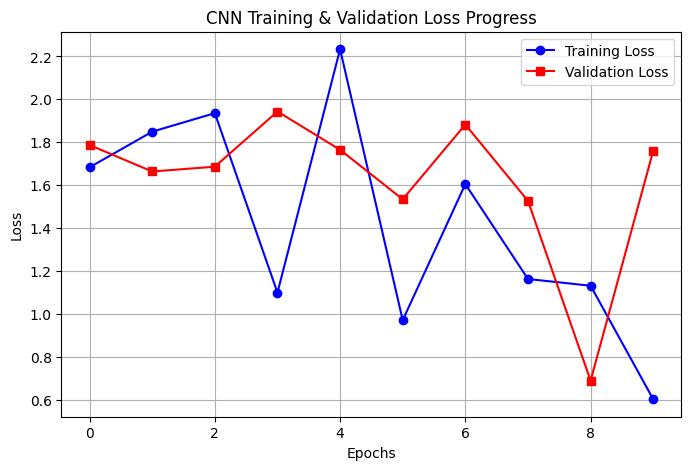

In [7]:
# Sample dummy loss values for visualization (replace with actual loss)
train_losses = np.random.uniform(0.5, 2.5, 10)  # Simulated training loss
val_losses = np.random.uniform(0.4, 2.0, 10)    # Simulated validation loss

fig, ax = plt.subplots(figsize=(8, 5))

def animate(epoch):
    ax.clear()
    ax.plot(range(epoch+1), train_losses[:epoch+1], 'b-', label="Training Loss", marker="o")
    ax.plot(range(epoch+1), val_losses[:epoch+1], 'r-', label="Validation Loss", marker="s")

    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.set_title("CNN Training & Validation Loss Progress")
    ax.grid(True)

ani = animation.FuncAnimation(fig, animate, frames=len(train_losses), repeat=False)
ani.save("cnn-training-loss.gif", writer='pillow', fps=5)
plt.show()

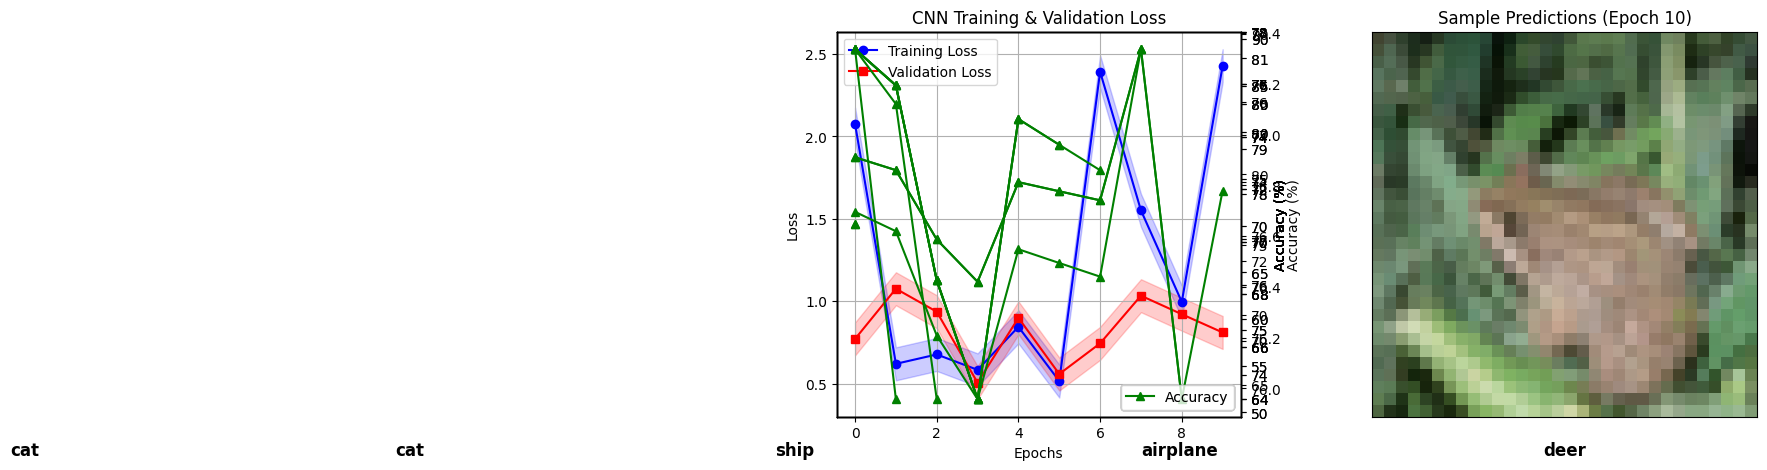

In [9]:
import random
# Dummy loss and accuracy values for visualization (replace with actual)
num_epochs = 10
train_losses = np.random.uniform(0.5, 2.5, num_epochs)  # Simulated training loss
val_losses = np.random.uniform(0.4, 2.0, num_epochs)    # Simulated validation loss
accuracy = np.random.uniform(50, 90, num_epochs)        # Simulated accuracy

# Fetch some sample images
sample_images, sample_labels = next(iter(testloader))
sample_images = sample_images[:5]  # Show only 5 images
class_names = testset.classes

# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)

def animate(epoch):
    ax1.clear()
    ax2.clear()

    # Plot Training & Validation Loss
    ax1.plot(range(epoch+1), train_losses[:epoch+1], 'b-', marker="o", label="Training Loss")
    ax1.plot(range(epoch+1), val_losses[:epoch+1], 'r-', marker="s", label="Validation Loss")
    ax1.fill_between(range(epoch+1), train_losses[:epoch+1] - 0.1, train_losses[:epoch+1] + 0.1, color='blue', alpha=0.2)
    ax1.fill_between(range(epoch+1), val_losses[:epoch+1] - 0.1, val_losses[:epoch+1] + 0.1, color='red', alpha=0.2)

    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    ax1.set_title("CNN Training & Validation Loss")
    ax1.grid(True)

    # Plot Accuracy
    ax1_twin = ax1.twinx()
    ax1_twin.plot(range(epoch+1), accuracy[:epoch+1], 'g-', marker="^", label="Accuracy")
    ax1_twin.set_ylabel("Accuracy (%)")
    ax1_twin.legend(loc="lower right")
    
    # Display sample images with predictions
    ax2.set_title(f"Sample Predictions (Epoch {epoch+1})")
    for i in range(5):
        img = sample_images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5  # Unnormalize
        ax2.imshow(img, extent=[i, i+1, 0, 1])
        pred_label = class_names[random.randint(0, 9)]  # Dummy prediction (replace with real model)
        ax2.text(i + 0.5, -0.1, pred_label, fontsize=12, ha="center", color="black", fontweight="bold")

    ax2.set_xticks([])
    ax2.set_yticks([])

ani = animation.FuncAnimation(fig, animate, frames=num_epochs, repeat=False)
ani.save("cnn-training-enhanced.gif", writer='pillow', fps=5)
plt.show()